In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)
from lazypredict.Supervised import LazyClassifier
import lazypredict
import plotly.express as px


from sklearn import tree
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,Perceptron,PassiveAggressiveClassifier,RidgeClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier,VotingClassifier,BaggingRegressor,ExtraTreesClassifier
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix , fbeta_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

In [2]:
train_df = pd.read_csv('Parkinsson_disease.csv')
train_df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1       119.99        157.30         75.00            0.01   
1  phon_R01_S01_2       122.40        148.65        113.82            0.01   
2  phon_R01_S01_3       116.68        131.11        111.56            0.01   
3  phon_R01_S01_4       116.68        137.87        111.37            0.01   
4  phon_R01_S01_5       116.01        141.78        110.66            0.01   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0              0.00      0.00      0.01        0.01          0.04   
1              0.00      0.00      0.01        0.01          0.06   
2              0.00      0.01      0.01        0.02          0.05   
3              0.00      0.01      0.01        0.02          0.05   
4              0.00      0.01      0.01        0.02          0.06   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  NHR  \
0              0.43          0.02          0.03      0.03         0.07 0.02   
1              0.63          0.03          0.05      0.04         0.09 0.02   
2              0.48          0.03          0.04      0.04         0.08 0.01   
3              0.52          0.03          0.04      0.04         0.09 0.01   
4              0.58          0.03          0.05      0.04         0.10 0.02   

    HNR  status  RPDE  DFA  spread1  spread2   D2  PPE  
0 21.03       1  0.41 0.82    -4.81     0.27 2.30 0.28  
1 19.09       1  0.46 0.82    -4.08     0.34 2.49 0.37  
2 20.65       1  0.43 0.83    -4.44     0.31 2.34 0.33  
3 20.64       1  0.43 0.82    -4.12     0.33 2.41 0.37  
4 19.65       1  0.42 0.82    -3.75     0.23 2.33 0.41

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
train_df.isnull().values.any()

False

In [5]:
train_df.drop("name",axis=1,inplace=True)
train_df.drop_duplicates(inplace=True)

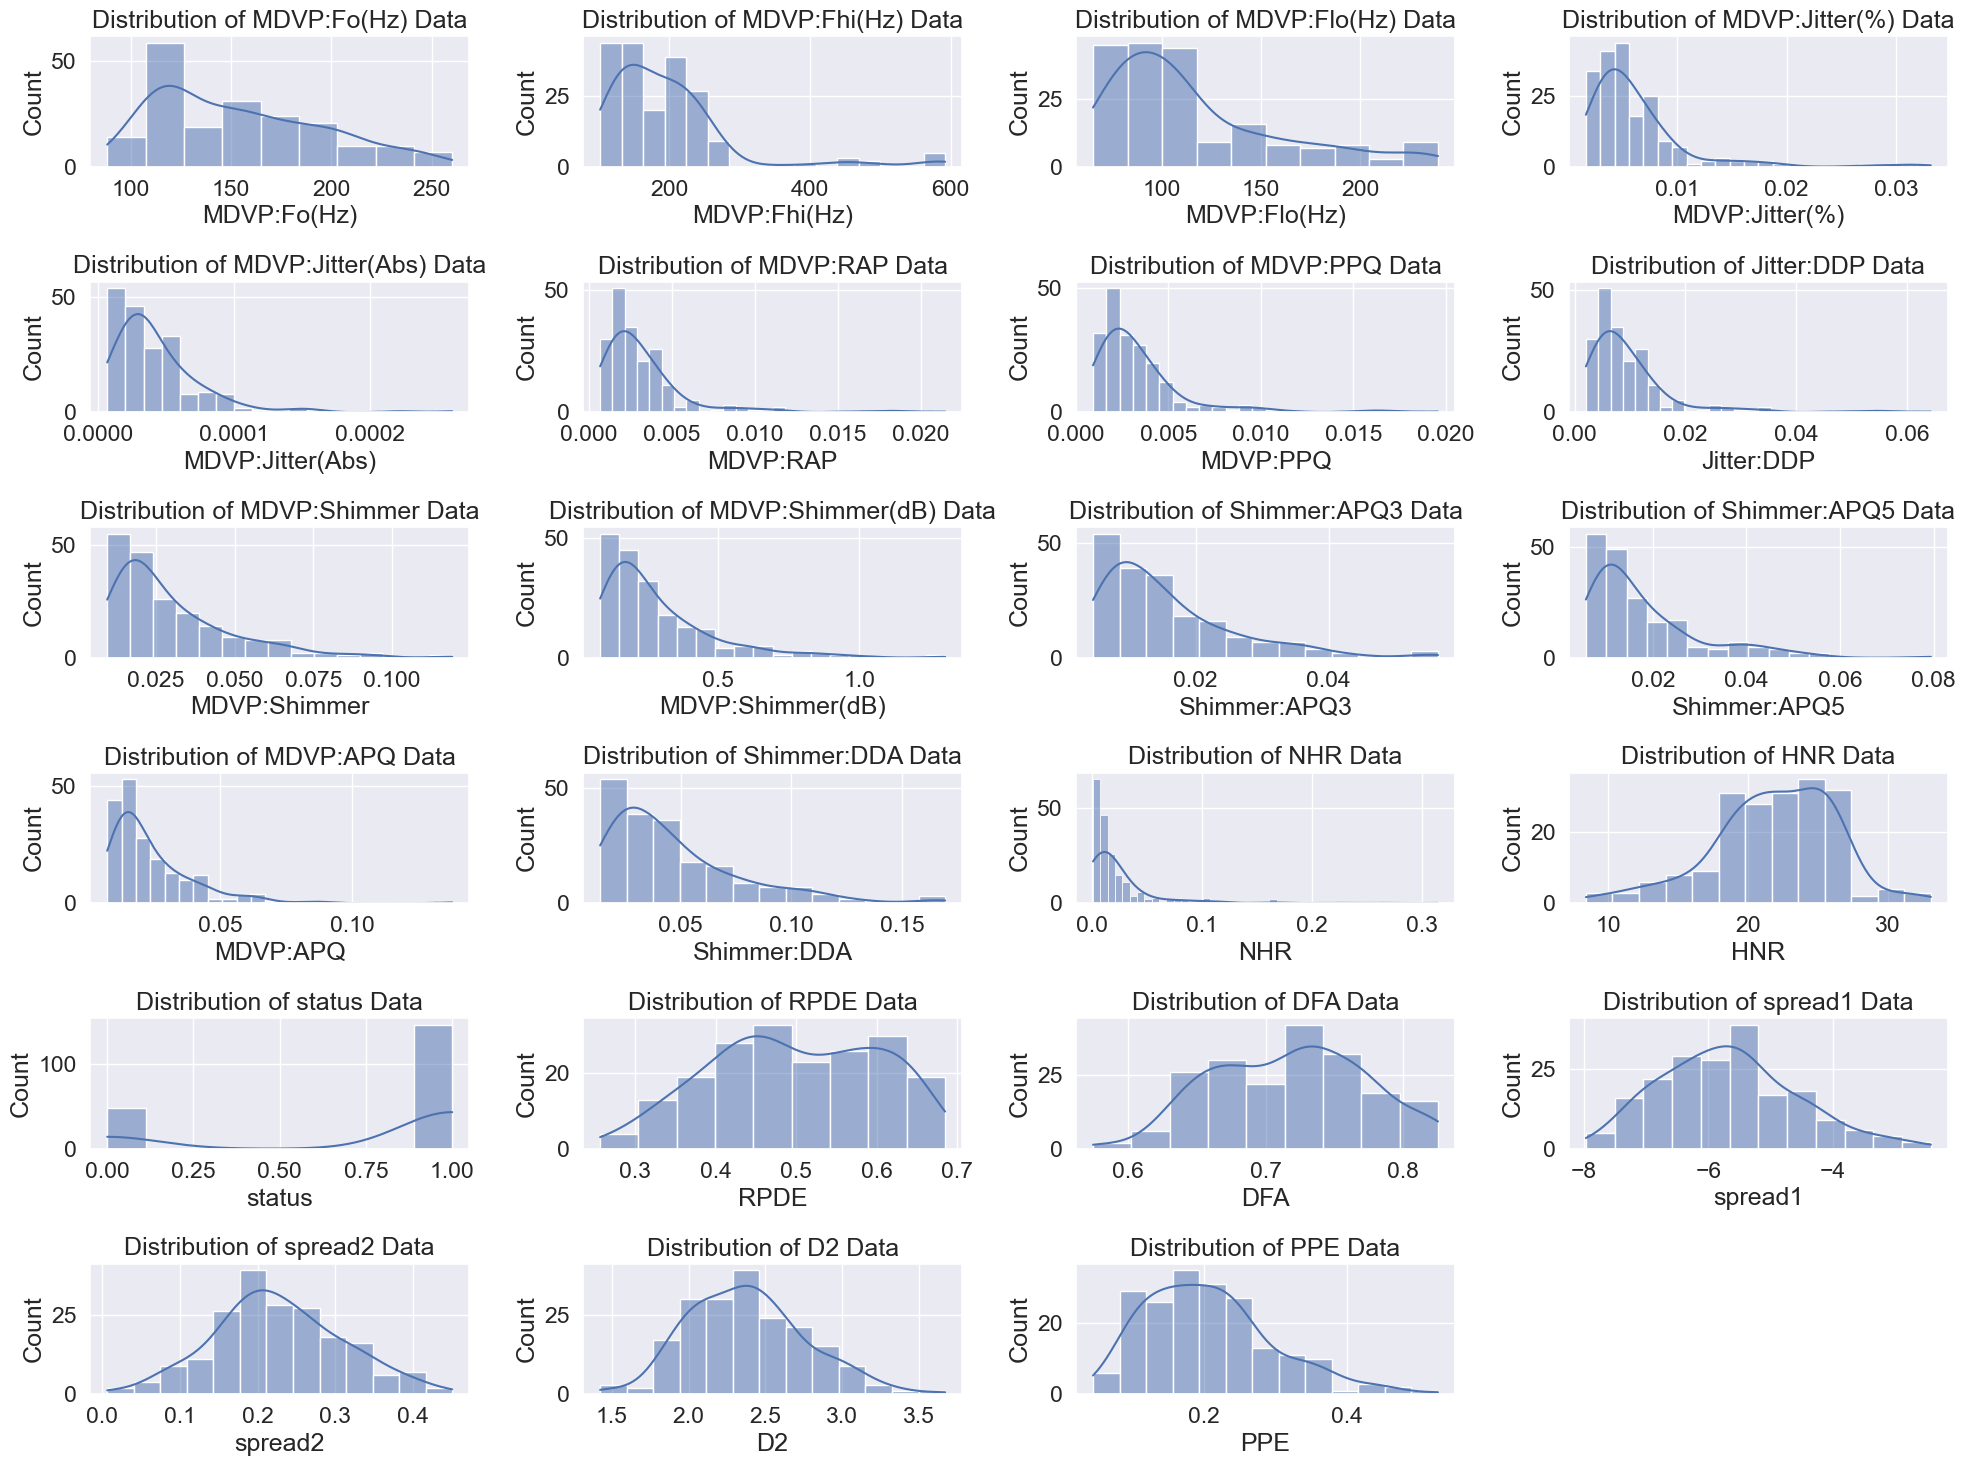

In [6]:
plt.figure(figsize=(20,15))
for i,col in enumerate(train_df.columns,1):
    plt.subplot(6,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(train_df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [7]:
numeric_columns = (list(train_df.loc[:]))

In [8]:
X = train_df.drop(columns=["status"])
y = train_df[["status"]]

# We will use many ml algorithms some of which require scaled data so we need a copy of our data scaled.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=0)

In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,stratify=y,test_size=0.3,random_state=0)

In [12]:
training_score = []
testing_score = []
ff1_score = []
ffbeta_score = []

In [13]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)
    b = accuracy_score(y_test1,x_test_pred1)
    c = f1_score(y_test1,x_test_pred1)
    d = fbeta_score(y_test1,x_test_pred1,beta=2.0)
    training_score.append(a)
    testing_score.append(b)
    ff1_score.append(c)
    ffbeta_score.append(d)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Blues")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 0.875
Accuracy_Score of LogisticRegression() model on Testing Data is: 0.7796610169491526

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.8974358974358975
Recall Score of LogisticRegression() model is: 0.7954545454545454
F1 Score of LogisticRegression() model is: 0.8433734939759037

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


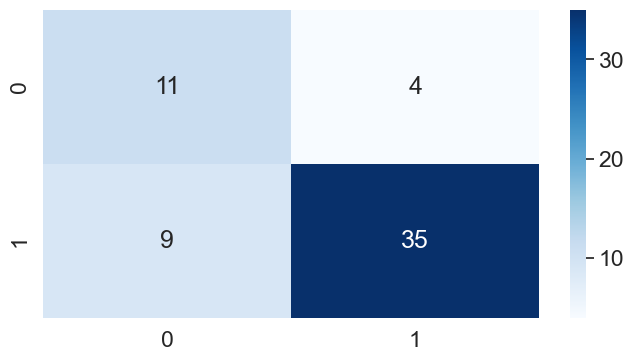

In [14]:
model_prediction(LogisticRegression())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 0.9264705882352942
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 0.8813559322033898

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.9302325581395349
Recall Score of KNeighborsClassifier() model is: 0.9090909090909091
F1 Score of KNeighborsClassifier() model is: 0.9195402298850575

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


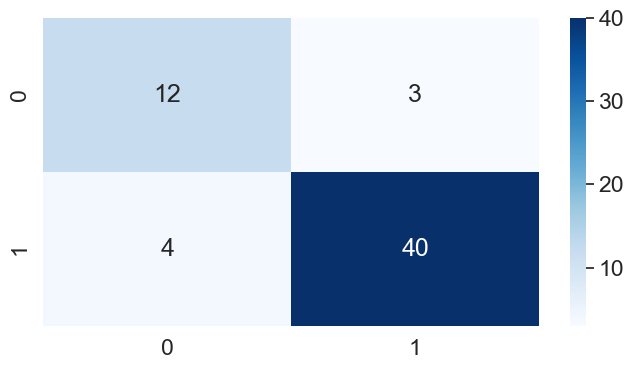

In [15]:
model_prediction(KNeighborsClassifier())

Accuracy_Score of SVC() model on Training Data is: 0.8897058823529411
Accuracy_Score of SVC() model on Testing Data is: 0.8983050847457628

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.8958333333333334
Recall Score of SVC() model is: 0.9772727272727273
F1 Score of SVC() model is: 0.9347826086956522

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


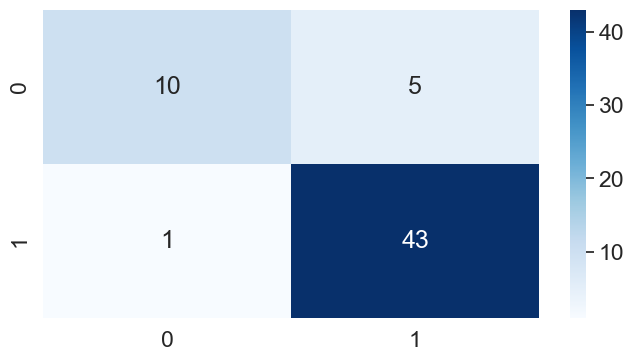

In [16]:
model_prediction(SVC())

Accuracy_Score of MLPClassifier() model on Training Data is: 0.9485294117647058
Accuracy_Score of MLPClassifier() model on Testing Data is: 0.864406779661017

------------------------------------------------------------------------
Precision Score of MLPClassifier() model is: 0.9285714285714286
Recall Score of MLPClassifier() model is: 0.8863636363636364
F1 Score of MLPClassifier() model is: 0.9069767441860465

------------------------------------------------------------------------
Confusion Matrix of MLPClassifier() model is:


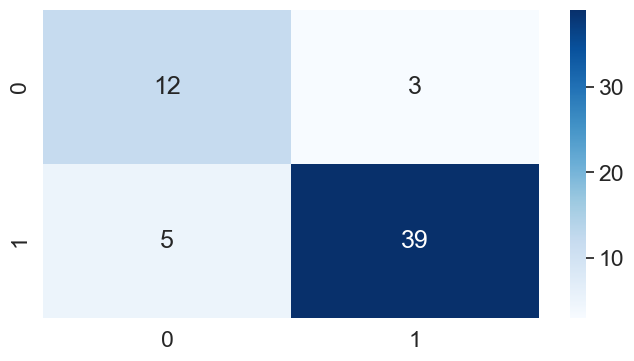

In [17]:
model_prediction(MLPClassifier())

Accuracy_Score of Perceptron() model on Training Data is: 0.8823529411764706
Accuracy_Score of Perceptron() model on Testing Data is: 0.6949152542372882

------------------------------------------------------------------------
Precision Score of Perceptron() model is: 0.90625
Recall Score of Perceptron() model is: 0.6590909090909091
F1 Score of Perceptron() model is: 0.763157894736842

------------------------------------------------------------------------
Confusion Matrix of Perceptron() model is:


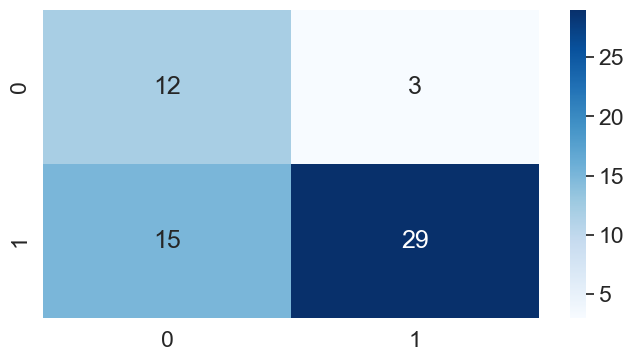

In [18]:
model_prediction(Perceptron())

Accuracy_Score of PassiveAggressiveClassifier() model on Training Data is: 0.8529411764705882
Accuracy_Score of PassiveAggressiveClassifier() model on Testing Data is: 0.9152542372881356

------------------------------------------------------------------------
Precision Score of PassiveAggressiveClassifier() model is: 0.8979591836734694
Recall Score of PassiveAggressiveClassifier() model is: 1.0
F1 Score of PassiveAggressiveClassifier() model is: 0.9462365591397849

------------------------------------------------------------------------
Confusion Matrix of PassiveAggressiveClassifier() model is:


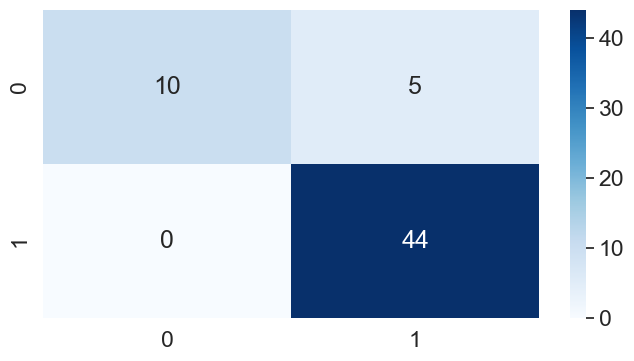

In [19]:
model_prediction(PassiveAggressiveClassifier())

Accuracy_Score of RidgeClassifier() model on Training Data is: 0.8897058823529411
Accuracy_Score of RidgeClassifier() model on Testing Data is: 0.8305084745762712

------------------------------------------------------------------------
Precision Score of RidgeClassifier() model is: 0.9047619047619048
Recall Score of RidgeClassifier() model is: 0.8636363636363636
F1 Score of RidgeClassifier() model is: 0.8837209302325582

------------------------------------------------------------------------
Confusion Matrix of RidgeClassifier() model is:


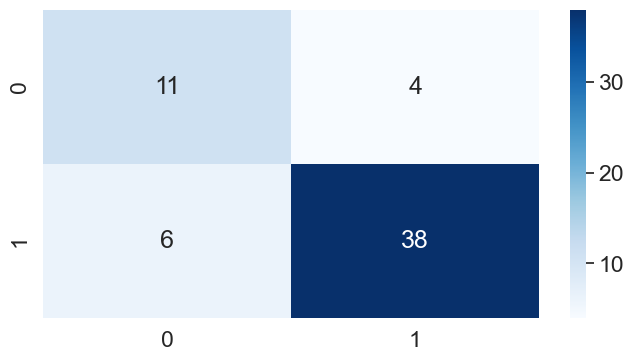

In [20]:
model_prediction(RidgeClassifier())

Accuracy_Score of ExtraTreesClassifier() model on Training Data is: 1.0
Accuracy_Score of ExtraTreesClassifier() model on Testing Data is: 0.8813559322033898

------------------------------------------------------------------------
Precision Score of ExtraTreesClassifier() model is: 0.8936170212765957
Recall Score of ExtraTreesClassifier() model is: 0.9545454545454546
F1 Score of ExtraTreesClassifier() model is: 0.9230769230769231

------------------------------------------------------------------------
Confusion Matrix of ExtraTreesClassifier() model is:


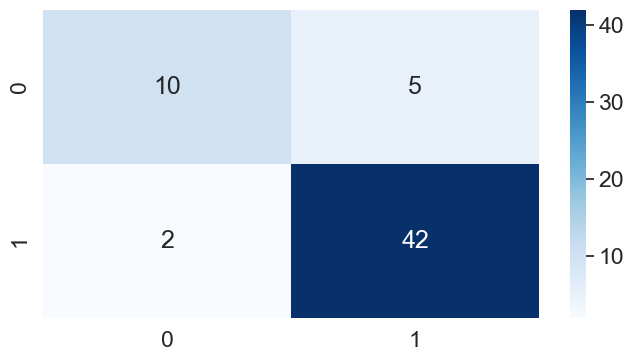

In [21]:
model_prediction(ExtraTreesClassifier())

Accuracy_Score of NearestCentroid() model on Training Data is: 0.7647058823529411
Accuracy_Score of NearestCentroid() model on Testing Data is: 0.6610169491525424

------------------------------------------------------------------------
Precision Score of NearestCentroid() model is: 0.9
Recall Score of NearestCentroid() model is: 0.6136363636363636
F1 Score of NearestCentroid() model is: 0.7297297297297297

------------------------------------------------------------------------
Confusion Matrix of NearestCentroid() model is:


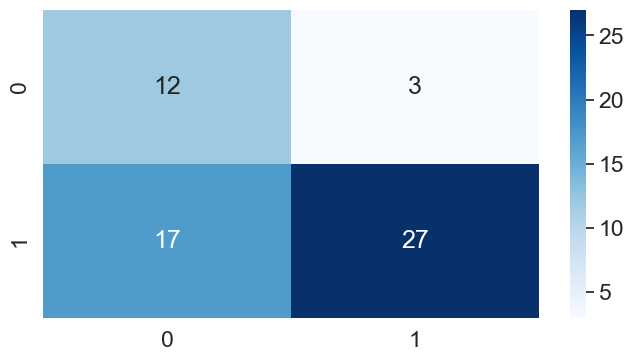

In [22]:
model_prediction(NearestCentroid())

Accuracy_Score of GaussianNB() model on Training Data is: 0.75
Accuracy_Score of GaussianNB() model on Testing Data is: 0.6440677966101694

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.896551724137931
Recall Score of GaussianNB() model is: 0.5909090909090909
F1 Score of GaussianNB() model is: 0.7123287671232877

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


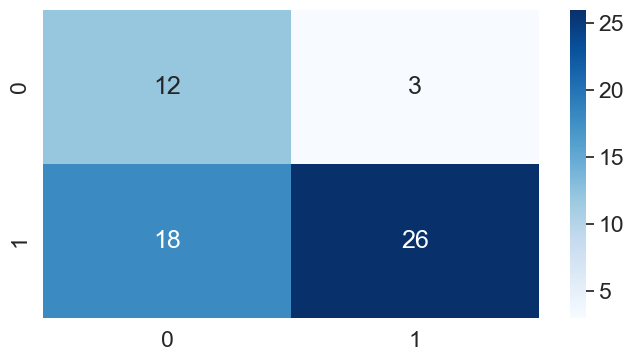

In [23]:
model_prediction(GaussianNB())

In [24]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)
    b = accuracy_score(y_test,x_test_pred)
    c = f1_score(y_test,x_test_pred)
    d = fbeta_score(y_test,x_test_pred,beta=2.0)
    training_score.append(a)
    testing_score.append(b)
    ff1_score.append(c)
    ffbeta_score.append(d)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Blues")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 1.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 0.864406779661017

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.9285714285714286
Recall Score of DecisionTreeClassifier() model is: 0.8863636363636364
F1 Score of DecisionTreeClassifier() model is: 0.9069767441860465

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


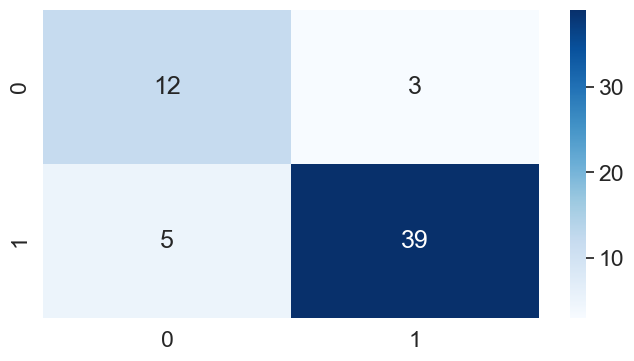

In [25]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 1.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 0.864406779661017

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.9090909090909091
Recall Score of RandomForestClassifier() model is: 0.9090909090909091
F1 Score of RandomForestClassifier() model is: 0.9090909090909091

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


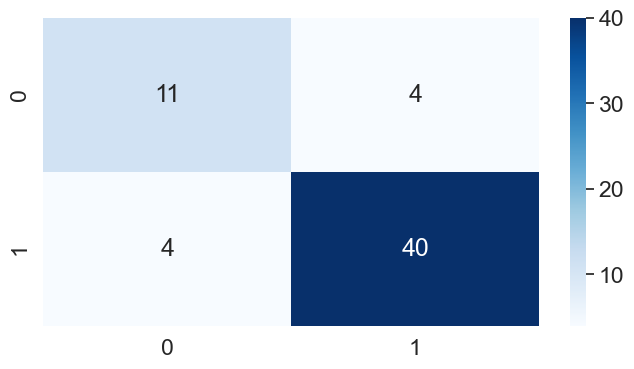

In [26]:
model_prediction(RandomForestClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 1.0
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 0.8983050847457628

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.9130434782608695
Recall Score of AdaBoostClassifier() model is: 0.9545454545454546
F1 Score of AdaBoostClassifier() model is: 0.9333333333333332

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


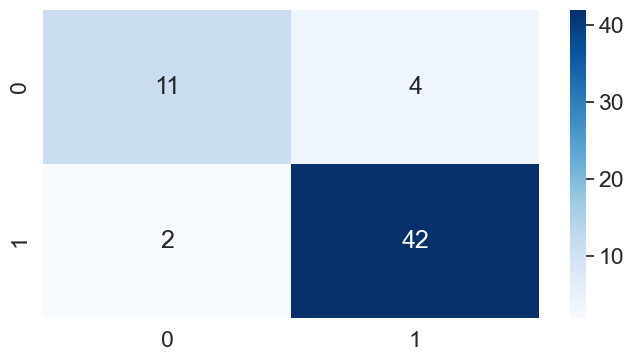

In [27]:
model_prediction(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 1.0
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 0.8813559322033898

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.8936170212765957
Recall Score of GradientBoostingClassifier() model is: 0.9545454545454546
F1 Score of GradientBoostingClassifier() model is: 0.9230769230769231

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


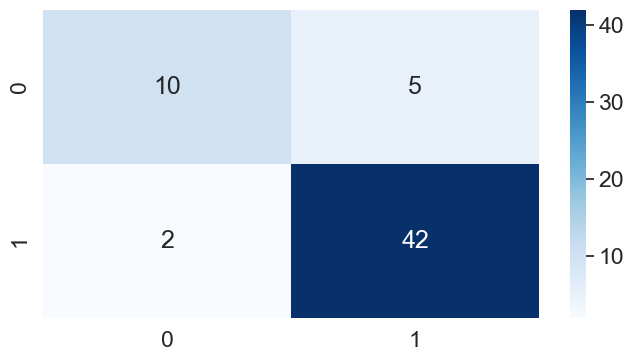

In [28]:
model_prediction(GradientBoostingClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.6, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 0.8970588235294118
Accuracy_Score of XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
              early_stoppin

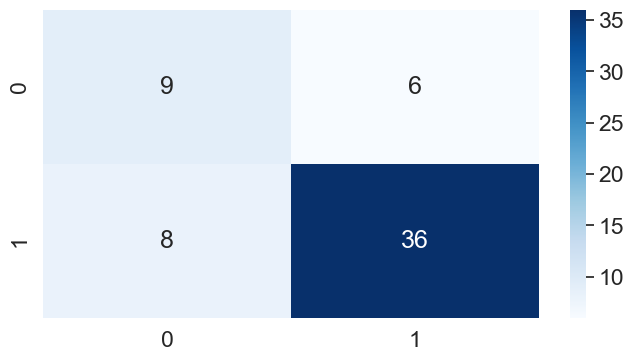

In [29]:
model_prediction(XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5))

# We fit some models with the data so they can be used in conjunction with one another. The selection is based both on the performance but also on the differences of the algorithms in the way they work.

In [30]:
model1 = SVC()

In [31]:
model1.fit(x_train,y_train)

SVC()

In [32]:
model2 = KNeighborsClassifier()

In [33]:
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
model3 = XGBClassifier()

# Using grid search for parameter tuning.

In [35]:
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [36]:
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

In [37]:
grid_search3.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [38]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'learning_rate': 0.3, 'n_estimators': 150, 'random_state': 0}

In [39]:
model3 = XGBClassifier(**best_parameters3)

In [40]:
model3.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

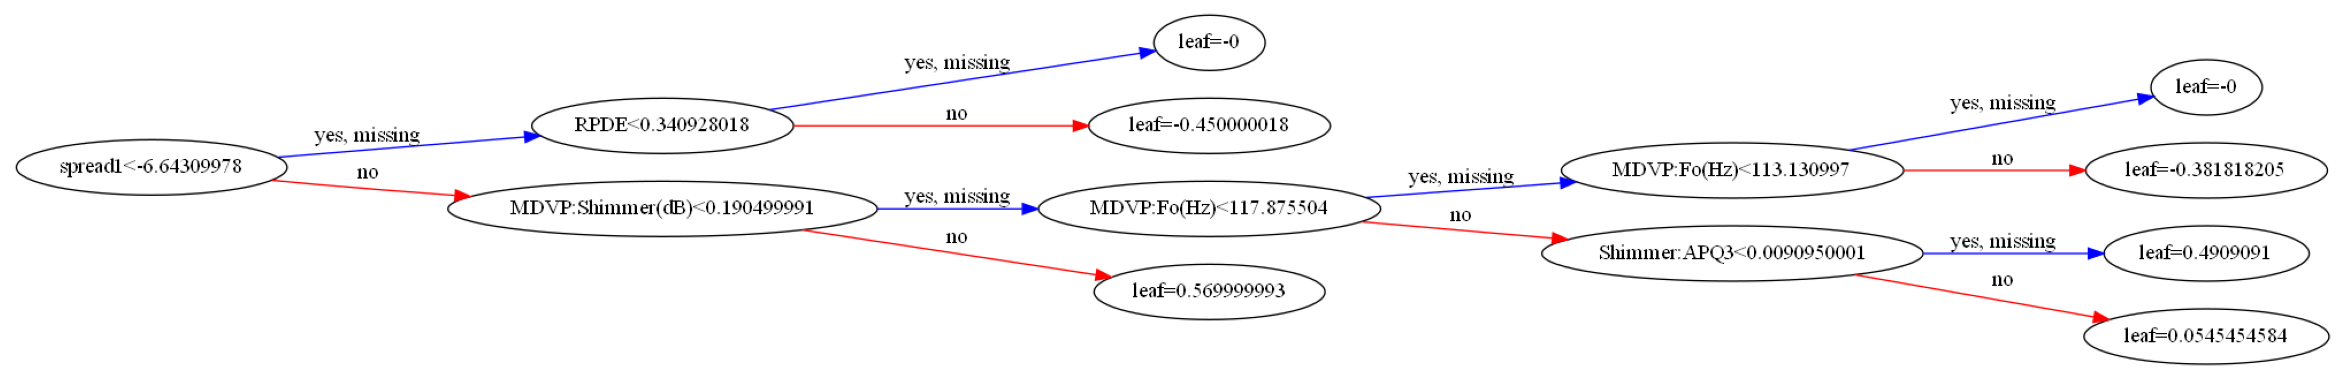

In [41]:
fig, ax = plt.subplots(figsize=(30, 30))
from xgboost import plot_tree
plot_tree(model3,num_trees=0,rankdir="LR",ax=ax)
plt.show()

In [42]:
model4 = DecisionTreeClassifier()


In [43]:
model4.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [45]:
model5 = AdaBoostClassifier()

In [46]:
model5.fit(x_train,y_train)

AdaBoostClassifier()

In [47]:
model6 = GradientBoostingClassifier()

In [48]:
model6.fit(x_train,y_train)

GradientBoostingClassifier()

In [49]:
from deslib.des import DESP
from deslib.des import KNORAE
from deslib.des import KNORAU
from deslib.des import KNOP

In [50]:
pool_classifiers = [model1, model2, model3, model4, model5, model6]

In [51]:
desp = DESP(pool_classifiers)
knorau = KNORAU(pool_classifiers)
kne = KNORAE(pool_classifiers) 

Accuracy_Score of DESP(pool_classifiers=[SVC(), KNeighborsClassifier(),
                       XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=...
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_de

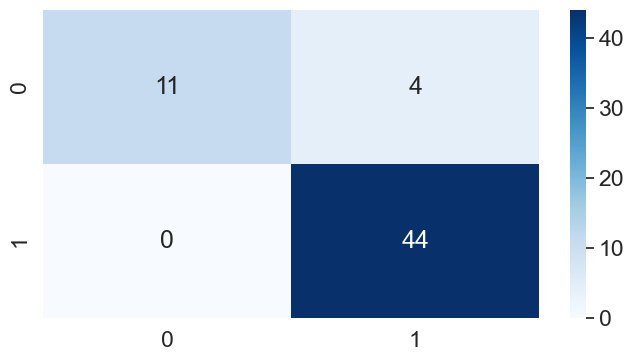

In [52]:
Desp = model_prediction(desp)

Accuracy_Score of KNORAU(pool_classifiers=[SVC(), KNeighborsClassifier(),
                         XGBClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, gpu_id=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraint...
                                       learning_rate=0.3, max_bin=None,
                                       max_cat_threshold=None,
                                       max_cat_to_onehot=None,
                                      

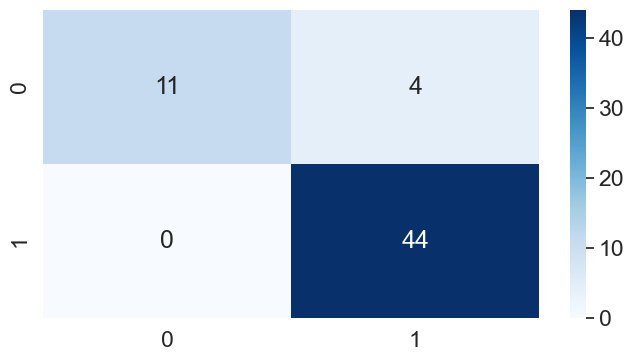

In [53]:
Knorau = model_prediction(knorau)

Accuracy_Score of KNORAE(pool_classifiers=[SVC(), KNeighborsClassifier(),
                         XGBClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, gpu_id=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraint...
                                       learning_rate=0.3, max_bin=None,
                                       max_cat_threshold=None,
                                       max_cat_to_onehot=None,
                                      

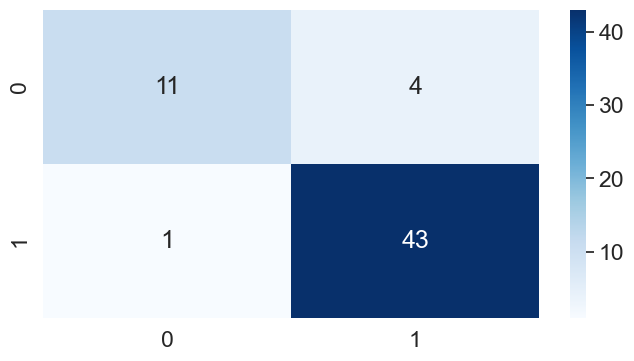

In [54]:
Kne = model_prediction(kne)

In [55]:
stacking_model2 = StackingClassifier(estimators=[('SVC', model1), 
                                                
                                                ('KNeighborsClassifier', model2), 
                                                
                                                ('GradientBoostingClassifier', model6)])

In [56]:
stacking_model2.fit(x_train, y_train)

StackingClassifier(estimators=[('SVC', SVC()),
                               ('KNeighborsClassifier', KNeighborsClassifier()),
                               ('GradientBoostingClassifier',
                                GradientBoostingClassifier())])

In [57]:
x_train_pred5 = stacking_model2.predict(x_train)

In [58]:
x_test_pred5 = stacking_model2.predict(x_test)

In [59]:
print("Stacking Model accuracy on Testing Data is:",accuracy_score(y_test,x_test_pred5)*100)

Stacking Model accuracy on Testing Data is: 91.52542372881356


In [60]:
print("F2 on Testing Data is:",fbeta_score(y_test,x_test_pred5,beta=2.0))

F2 on Testing Data is: 0.9777777777777776


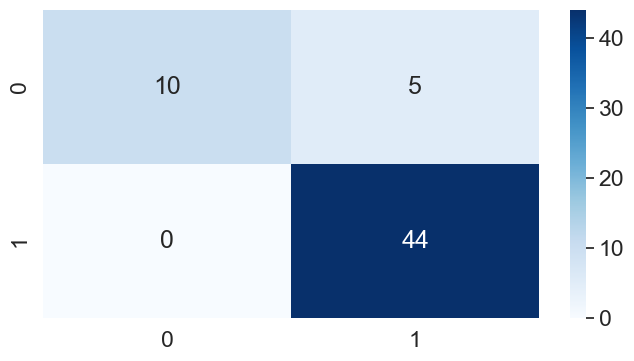

In [61]:
cm = confusion_matrix(y_test,x_test_pred5)
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues")
plt.show()

In [62]:
    a = accuracy_score(y_train,x_train_pred5)
    b = accuracy_score(y_test,x_test_pred5)
    c = f1_score(y_test,x_test_pred5)
    d = fbeta_score(y_test,x_test_pred5,beta=2.0)
    training_score.append(a)
    testing_score.append(b)
    ff1_score.append(c)
    ffbeta_score.append(d)

In [63]:
stacking_model3 = VotingClassifier(estimators=[ ('SVC', model1),  
                                                
                                                
                                                ('KNeighborsClassifier', model2),
                                                
                                                ('GradientBoostingClassifier', model6)],voting='hard')

In [64]:
stacking_model3.fit(x_train, y_train)

VotingClassifier(estimators=[('SVC', SVC()),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier())])

In [65]:
x_train_pred6 = stacking_model3.predict(x_train)

In [66]:
x_test_pred6 = stacking_model3.predict(x_test)

In [67]:
print("VotingClassifier accuracy on Testing Data is::",accuracy_score(y_test,x_test_pred6)*100)

VotingClassifier accuracy on Testing Data is:: 84.7457627118644


In [68]:
print("VotingClassifier F2 on Testing Data is:",fbeta_score(y_test,x_test_pred6,beta=2.0))

VotingClassifier F2 on Testing Data is: 0.9606986899563318


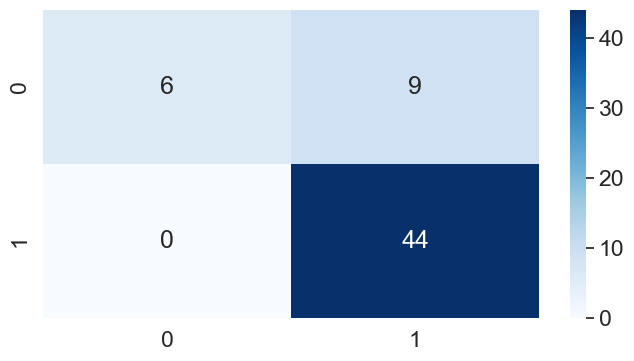

In [69]:
cm = confusion_matrix(y_test,x_test_pred6)
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues")
plt.show()

In [70]:
    a = accuracy_score(y_train,x_train_pred6)
    b = accuracy_score(y_test,x_test_pred6)
    c = f1_score(y_test,x_test_pred6)
    d = fbeta_score(y_test,x_test_pred6,beta=2.0)
    training_score.append(a)
    testing_score.append(b)
    ff1_score.append(c)
    ffbeta_score.append(d)

In [71]:
models = ["Logistic Regression","KNN","SVC","MLPClassifier","Perceptron","PassiveAggressiveClassifier","RidgeClassifier","ExtraTreesClassifier","NearestCentroid","Gausian","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","XGBoost","Desp","Knorau","Kne","StackingClassifier","VotingClassifier"]

In [72]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score (Accuracy)":testing_score,
                   "F1 Score":ff1_score,
                   "F2 Score":ffbeta_score,
                    })

In [73]:
df = df.sort_values(by='F2 Score', ascending=False)

In [74]:
df

Algorithms  Training Score  Testing Score (Accuracy)  \
16                       Knorau            1.00                      0.93   
15                         Desp            1.00                      0.93   
18           StackingClassifier            1.00                      0.92   
5   PassiveAggressiveClassifier            0.85                      0.92   
17                          Kne            1.00                      0.92   
19             VotingClassifier            0.90                      0.85   
2                           SVC            0.89                      0.90   
12                    Ada Boost            1.00                      0.90   
7          ExtraTreesClassifier            1.00                      0.88   
13               Gradient Boost            1.00                      0.88   
1                           KNN            0.93                      0.88   
11                Random Forest            1.00                      0.86   
10                Decision Tree            1.00                      0.86   
3                 MLPClassifier            0.95                      0.86   
6               RidgeClassifier            0.89                      0.83   
14                      XGBoost            0.90                      0.76   
0           Logistic Regression            0.88                      0.78   
4                    Perceptron            0.88                      0.69   
8               NearestCentroid            0.76                      0.66   
9                       Gausian            0.75                      0.64   

    F1 Score  F2 Score  
16      0.96      0.98  
15      0.96      0.98  
18      0.95      0.98  
5       0.95      0.98  
17      0.95      0.96  
19      0.91      0.96  
2       0.93      0.96  
12      0.93      0.95  
7       0.92      0.94  
13      0.92      0.94  
1       0.92      0.91  
11      0.91      0.91  
10      0.91      0.89  
3       0.91      0.89  
6       0.88      0.87  
14      0.84      0.83  
0       0.84      0.81  
4       0.76      0.70  
8       0.73      0.66  
9       0.71      0.63

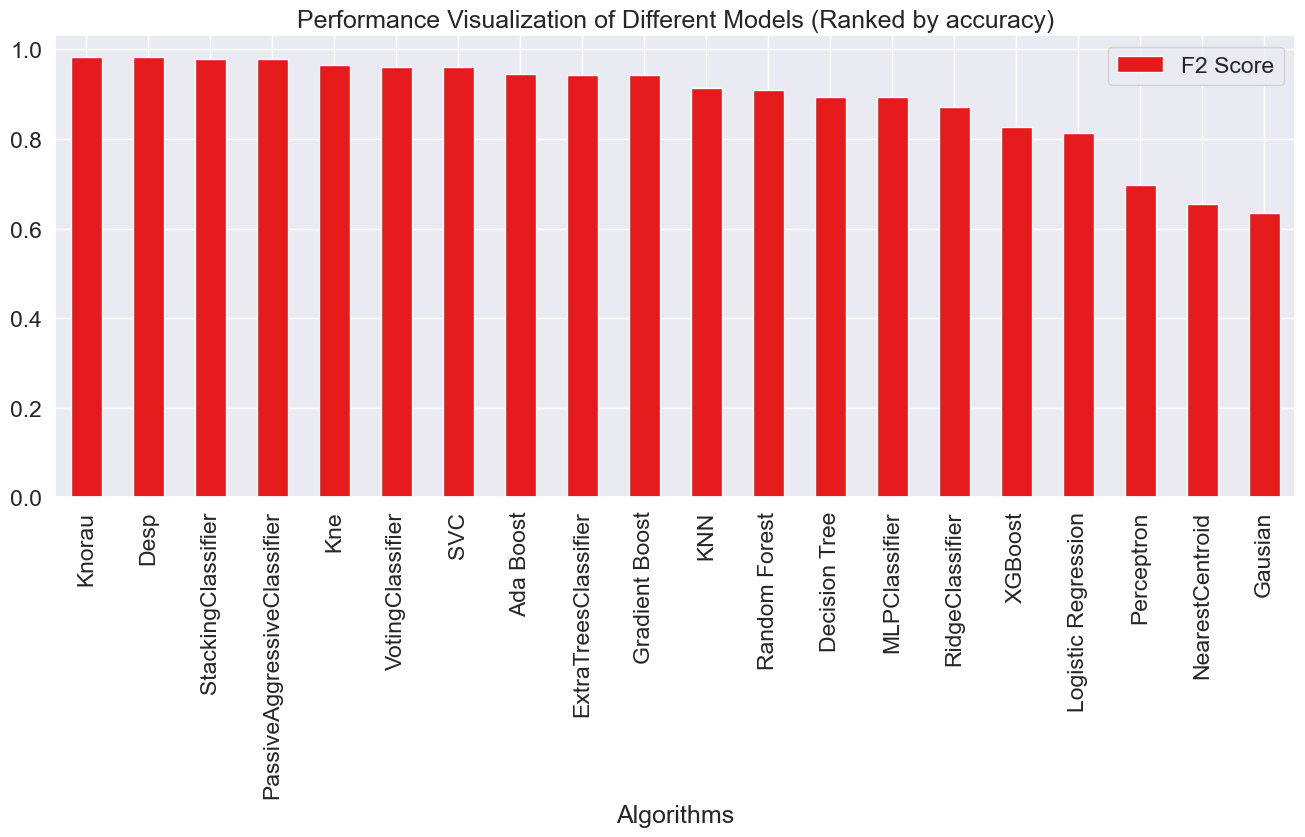

In [75]:
df.plot(x="Algorithms",y=["F2 Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models (Ranked by accuracy)",colormap="Set1")
plt.show()

In [76]:
line = px.line(data_frame= df , x="Algorithms", y =["F2 Score","Testing Score (Accuracy)" ] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "F2 SCORE")
line.update_layout(showlegend = True,
    title = {
        'text': 'F2 Score vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [77]:
df = df.sort_values(by='Testing Score (Accuracy)', ascending=False)

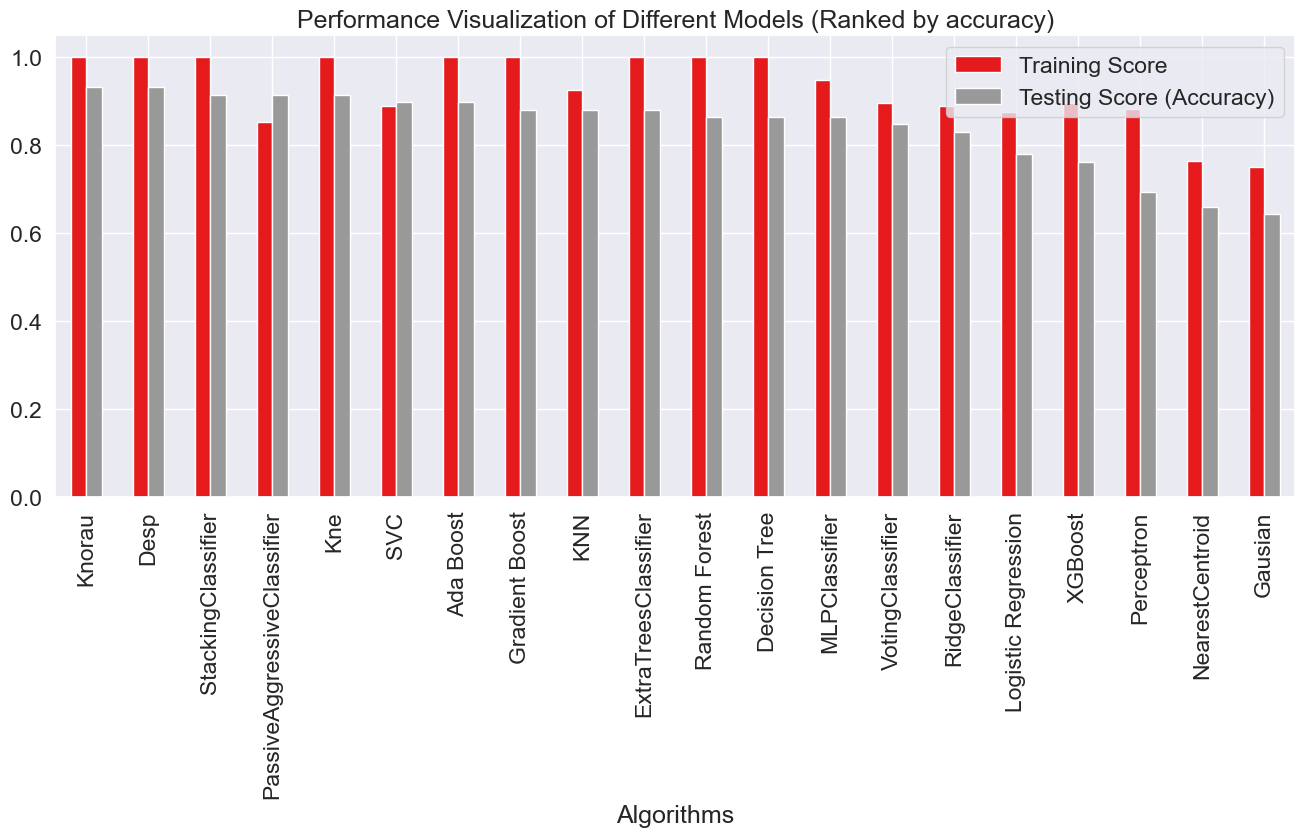

In [78]:
df.plot(x="Algorithms",y=["Training Score","Testing Score (Accuracy)"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models (Ranked by accuracy)",colormap="Set1")
plt.show()

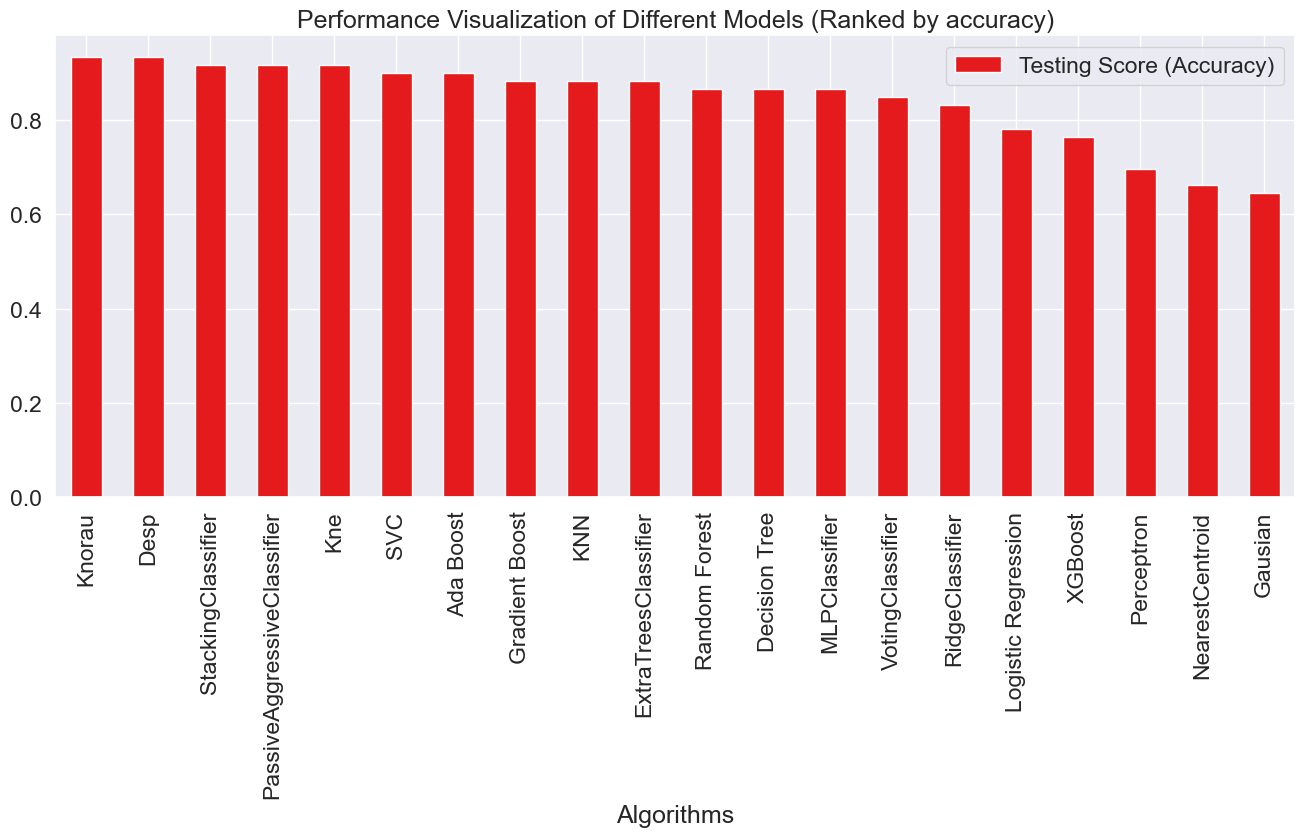

In [79]:
df.plot(x="Algorithms",y=["Testing Score (Accuracy)"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models (Ranked by accuracy)",colormap="Set1")
plt.show()